In [8]:
!pip install openpyxl
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 35.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 8.7 MB/s eta 0:00:00ta 0:00:01


In [10]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

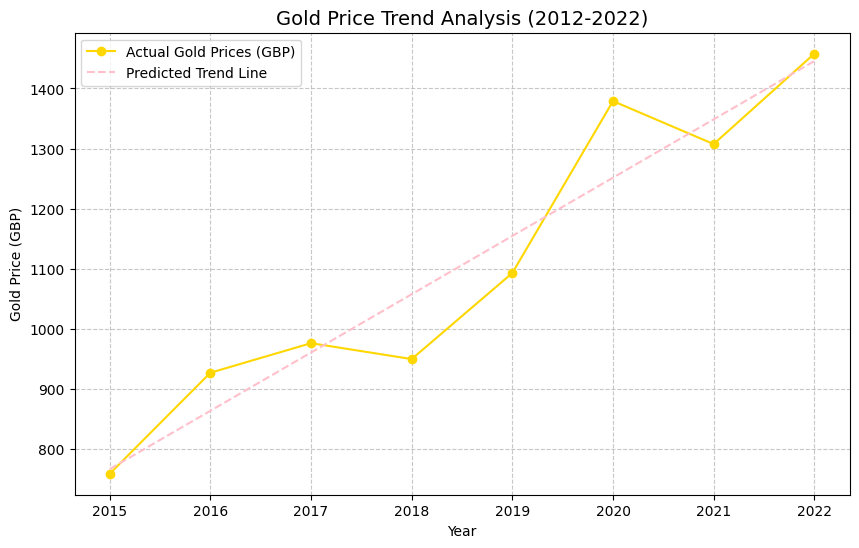

Linear Regression Slope: 96.99
Linear Regression Intercept: -194676.84


In [18]:
df = pd.read_excel("/Users/liyahliyah/Downloads/annual_gold_rate.xlsx")
df


# Prep data for linear regression

X = df_filtered['Year'].values.reshape(-1, 1)  # Reshaping to 2D array for the model
y = df_filtered['GBP'].values

# Fit linear regression model
model = LinearRegression().fit(X, y)

# Price trend prediction
trend = model.predict(X)

# Plot actual data and trend line
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Year'], y, label='Actual Gold Prices (GBP)', marker='o', color='gold')
plt.plot(df_filtered['Year'], trend, label='Predicted Trend Line', linestyle='--', color='Pink')
plt.title('Gold Price Trend Analysis (2012-2022)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Gold Price (GBP)')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# model's slope and intercept
print(f"Linear Regression Slope: {model.coef_[0]:.2f}")
print(f"Linear Regression Intercept: {model.intercept_:.2f}")


In [16]:
# Rsq value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# Forecast for 2023-2025
forecast_years = [2022, 2023, 2024, 2025]
forecast_X = np.array(forecast_years).reshape(-1, 1)  # Reshape for prediction

# Predictive prices for forecasted years
forecast_prices = model.predict(forecast_X)

# Print forecasted prices
for year, price in zip(forecast_years, forecast_prices):
    print(f"Forecasted Gold Price for {year}: £{price:.2f} GBP")

R-squared: 0.9126
Forecasted Gold Price for 2022: £1445.61 GBP
Forecasted Gold Price for 2023: £1542.60 GBP
Forecasted Gold Price for 2024: £1639.60 GBP
Forecasted Gold Price for 2025: £1736.59 GBP


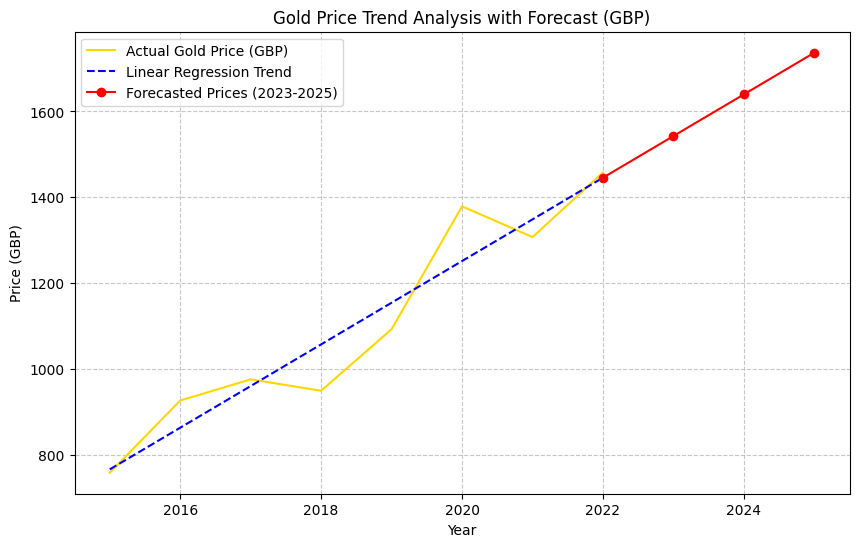

In [17]:
# Plot the historical data and the linear regression trend
plt.figure(figsize=(10, 6))

# Plot the actual data
plt.plot(df_filtered['Year'], df_filtered['GBP'], label='Actual Gold Price (GBP)', color='gold')

# Plot the linear regression line
plt.plot(df_filtered['Year'], model.predict(X), label='Linear Regression Trend', color='blue', linestyle='--')

# Plot the forecasted prices
plt.plot(forecast_years, forecast_prices, label='Forecasted Prices (2023-2025)', color='red', marker='o')

# Labels and Title
plt.title('Gold Price Trend Analysis with Forecast (GBP)')
plt.xlabel('Year')
plt.ylabel('Price (GBP)')
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

# Show the plot
plt.show()